In [107]:
# Import required libraries

import pandas as pd
import numpy as np
import kagglehub
import os
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline
rcParams['figure.figsize'] = 20, 15
sns.set_style('whitegrid')

In [108]:
'''  Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)
  1: erythema
  2: scaling
  3: definite borders
  4: itching
  5: koebner phenomenon
  6: polygonal papules
  7: follicular papules
  8: oral mucosal involvement
  9: knee and elbow involvement
 10: scalp involvement
 11: family history, (0 or 1)
 34: Age (linear)

 Histopathological Attributes: (take values 0, 1, 2, 3)
 12: melanin incontinence
 13: eosinophils in the infiltrate
 14: PNL infiltrate
 15: fibrosis of the papillary dermis
 16: exocytosis
 17: acanthosis
 18: hyperkeratosis
 19: parakeratosis
 20: clubbing of the rete ridges
 21: elongation of the rete ridges
 22: thinning of the suprapapillary epidermis
 23: spongiform pustule
 24: munro microabcess
 25: focal hypergranulosis
 26: disappearance of the granular layer
 27: vacuolisation and damage of basal layer
 28: spongiosis
 29: saw-tooth appearance of retes
 30: follicular horn plug
 31: perifollicular parakeratosis
 32: inflammatory monoluclear inflitrate
 33: band-like infiltrate '''

'  Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)\n  1: erythema\n  2: scaling\n  3: definite borders\n  4: itching\n  5: koebner phenomenon\n  6: polygonal papules\n  7: follicular papules\n  8: oral mucosal involvement\n  9: knee and elbow involvement\n 10: scalp involvement\n 11: family history, (0 or 1)\n 34: Age (linear)\n\n Histopathological Attributes: (take values 0, 1, 2, 3)\n 12: melanin incontinence\n 13: eosinophils in the infiltrate\n 14: PNL infiltrate\n 15: fibrosis of the papillary dermis\n 16: exocytosis\n 17: acanthosis\n 18: hyperkeratosis\n 19: parakeratosis\n 20: clubbing of the rete ridges\n 21: elongation of the rete ridges\n 22: thinning of the suprapapillary epidermis\n 23: spongiform pustule\n 24: munro microabcess\n 25: focal hypergranulosis\n 26: disappearance of the granular layer\n 27: vacuolisation and damage of basal layer\n 28: spongiosis\n 29: saw-tooth appearance of retes\n 30: follicular horn plug\n 31: perifollicular parak

In [132]:
# Import data 
# Download latest version

path = kagglehub.dataset_download("olcaybolat1/dermatology-dataset-classification")

print("Path to dataset files:", path)
print(os.listdir(path))
df = pd.read_csv(os.path.join(path,'dermatology_database_1.csv'))
df.head(10)

Path to dataset files: /Users/patrickmcelroy/.cache/kagglehub/datasets/olcaybolat1/dermatology-dataset-classification/versions/5
['dermatology_database_1.csv']


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
5,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18,5
7,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57,3
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22,4
9,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30,4


In [133]:
# Rename class column with the corresponding diseases

labels = {1: 'psoriasis', 2: 'seborrheic dermatitis', 3: 'lichen planus', 4: 'pityriasis rosea', 5: 'chronic dermatitis', 6: 'pityriasis rubra pilaris'}

df['class'] = df['class'].replace(labels)

In [134]:
# Column information

print("="*60)
print("Column Information:")
print("="*60)
print(df.info())

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence     

It is important to note that the age column is the only one that isn't an int datatype. We will look into this further.

In [135]:
# Statistical Summary

print("="*60)
print("Statistical Summary")
print("="*60)
df.describe().T

Statistical Summary


,count,mean,std,min,25%,50%,75%,max
erythema,366.0,2.068306,0.664753,0.0,2.0,2.0,2.0,3.0
scaling,366.0,1.795082,0.701527,0.0,1.0,2.0,2.0,3.0
definite_borders,366.0,1.549180,0.907525,0.0,1.0,2.0,2.0,3.0
itching,366.0,1.366120,1.138299,0.0,0.0,1.0,2.0,3.0
koebner_phenomenon,366.0,0.633880,0.908016,0.0,0.0,0.0,1.0,3.0
polygonal_papules,366.0,0.448087,0.957327,0.0,0.0,0.0,0.0,3.0
follicular_papules,366.0,0.166667,0.570588,0.0,0.0,0.0,0.0,3.0
oral_mucosal_involvement,366.0,0.377049,0.834147,0.0,0.0,0.0,0.0,3.0
knee_and_elbow_involvement,366.0,0.614754,0.982979,0.0,0.0,0.0,1.0,3.0
scalp_involvement,366.0,0.519126,0.905639,0.0,0.0,0.0,1.0,3.0


It looks as though most columns, aside from family_history and age, are categorical ranging from 0 to 3. Here 0 means not detected and 3 means detected, where 1 and 2 correspond to the severity of detection.

In [136]:
# Data Quality Assessment

print("="*60)
print("Missing or Null Values")
print("="*60)

missing_counts = (df == '?').sum()
missing_columns = missing_counts[missing_counts>0]
print("Columns with '?': ")
print(missing_columns)


Missing or Null Values
Columns with '?': 
age    8
dtype: int64


In [137]:
# Let's look at the rows with missing values

df[df['age'] == '?'][['age', 'class']]

,age,class
33,?,psoriasis
34,?,pityriasis rosea
35,?,seborrheic dermatitis
36,?,lichen planus
262,?,chronic dermatitis
263,?,chronic dermatitis
264,?,chronic dermatitis
265,?,chronic dermatitis


In [138]:
# We are going to impute those values with an age of 0

df['age'] = pd.to_numeric(df['age'], errors = 'coerce', downcast = 'integer')

df['age'] = df['age'].fillna(0)

We want to fill with 0 so that it is representative of a missing value, rather than the significance of missing values being lost when replaced with the median or mean.

Histograms of Features


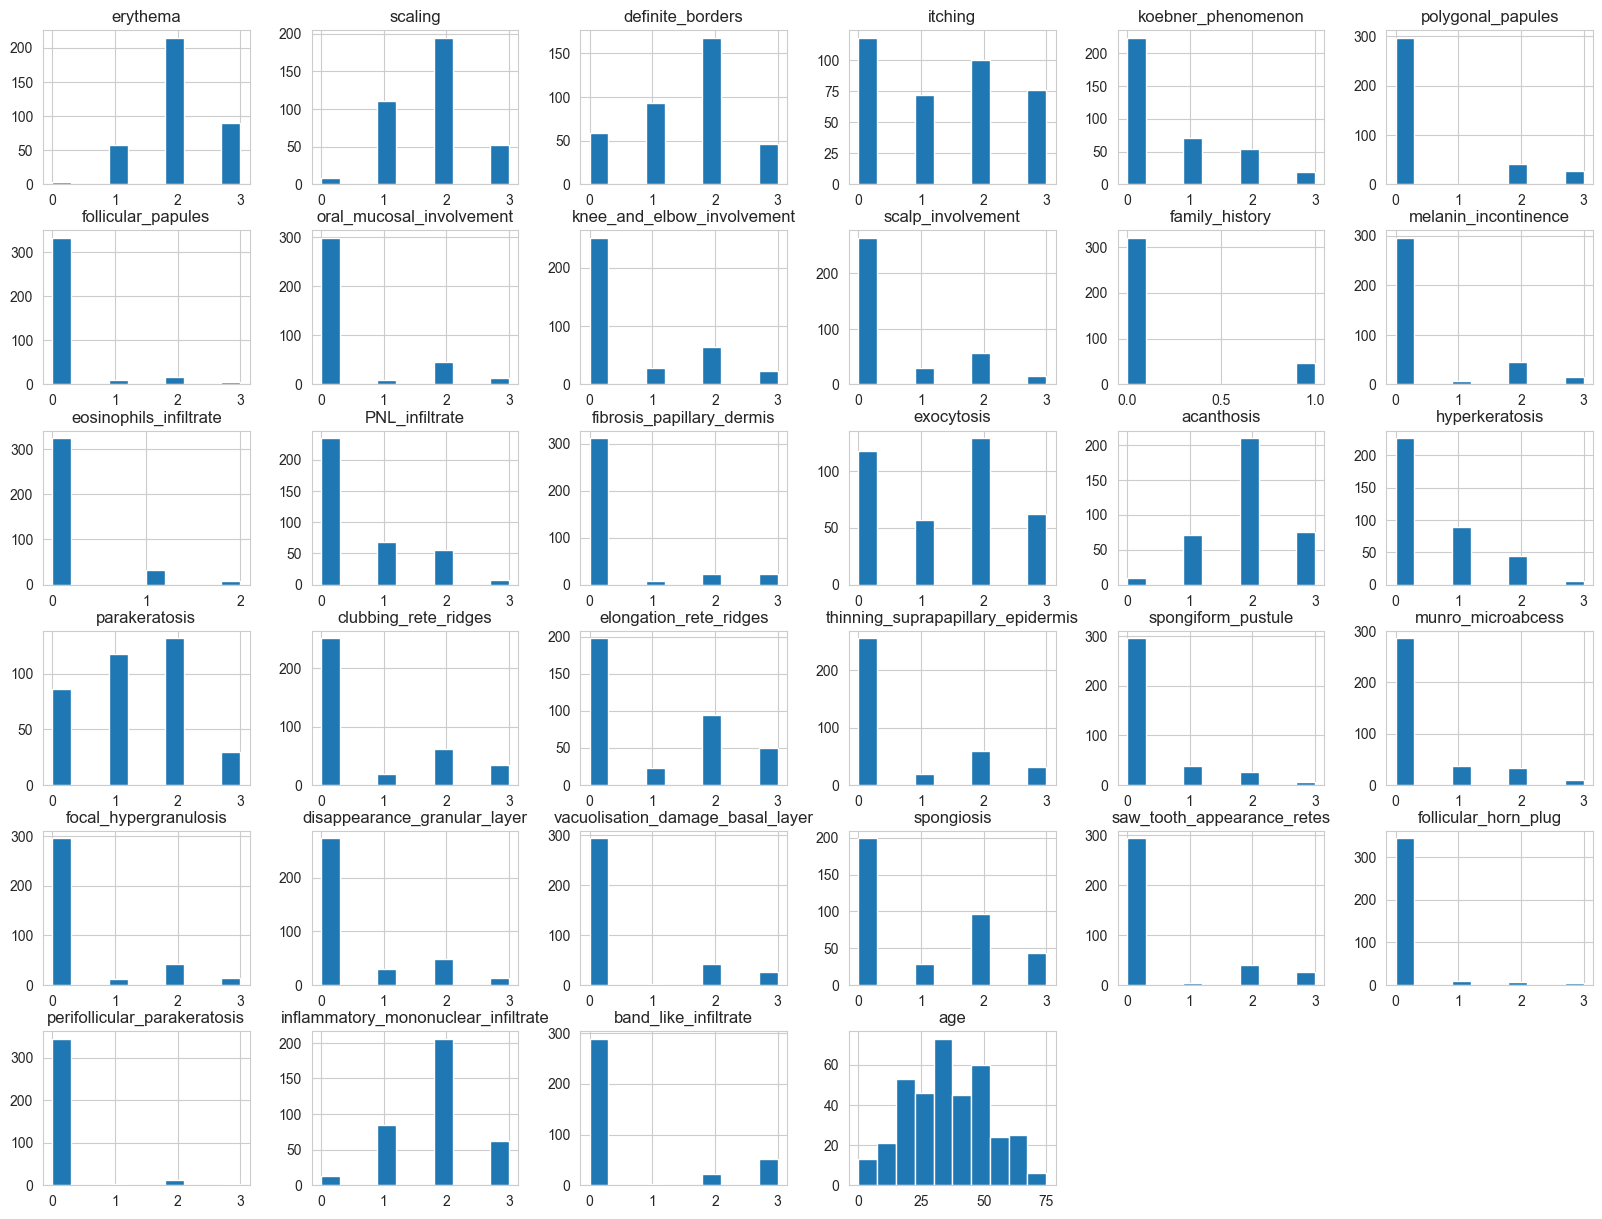

In [139]:
# Visualize the data with histograms and box plots, can help identify outliers

print("="*60)
print("Histograms of Features")
print("="*60)

df.hist(bins=10, figsize=(20,15))
plt.show()

Box Plots of Features


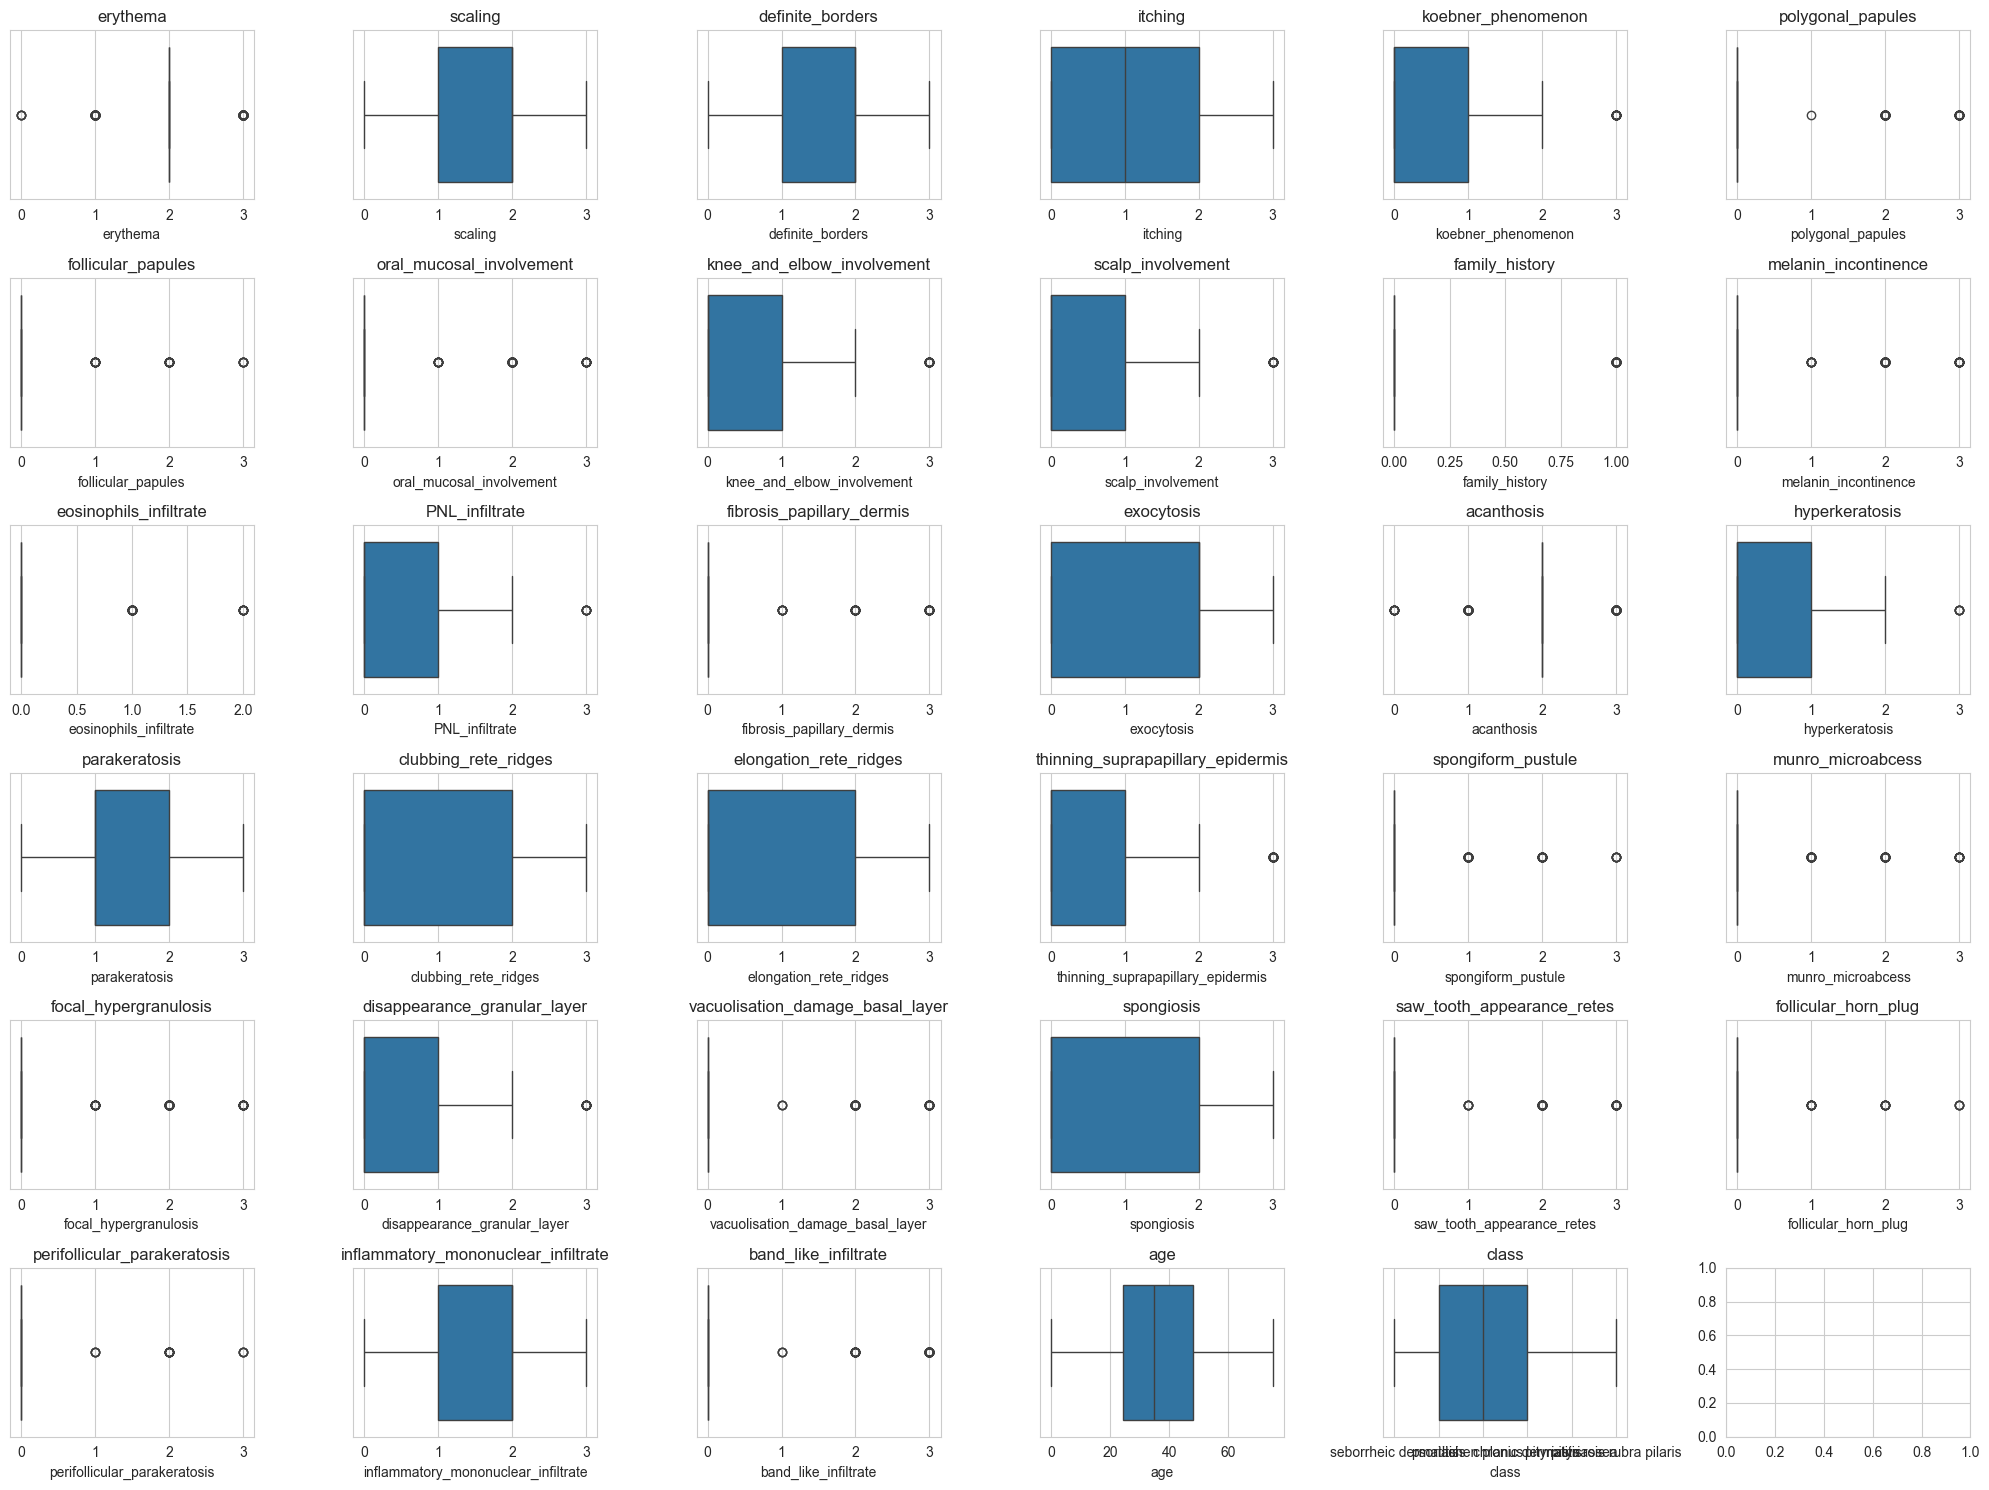

In [140]:
# Box Plots

print("="*60)
print("Box Plots of Features")
print("="*60)

fig, axes = plt.subplots(nrows = 6, ncols = 6, figsize = (20,15))

for i, column in enumerate(df.columns):
    row = i // 6
    col = i % 6
    sns.boxplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

Distribution of the Class Column


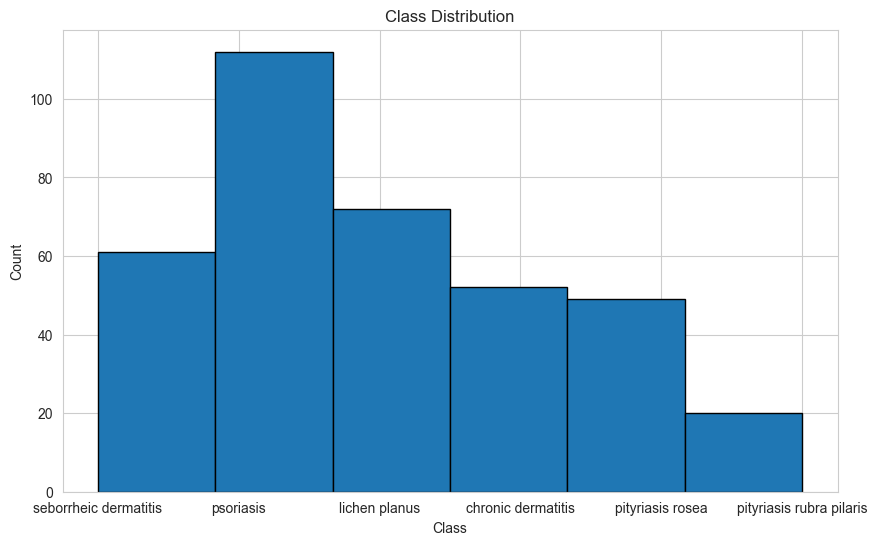

In [141]:
# Lets take a closer look at the distribution of the class labels in the dataset

print("="*60)
print("Distribution of the Class Column")
print("="*60)

df['class'].hist(bins=6, figsize=(10,6), edgecolor = 'black')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

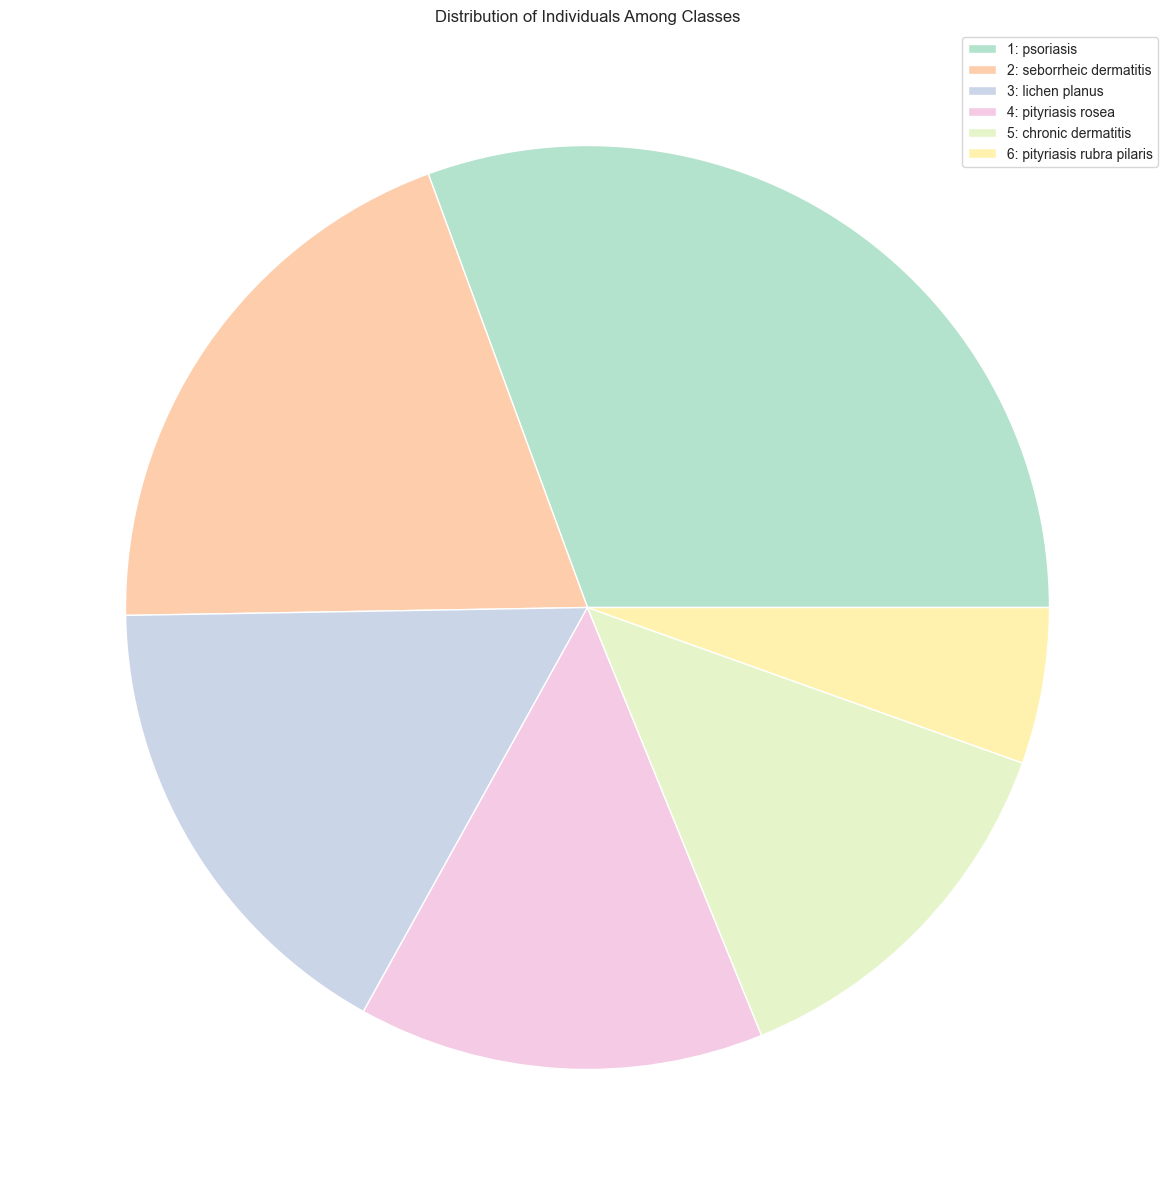

In [142]:
# Distribution of individuals among the classes
labels = ['1: psoriasis', '2: seborrheic dermatitis', '3: lichen planus', '4: pityriasis rosea', '5: chronic dermatitis', '6: pityriasis rubra pilaris']
plt.pie(df['class'].value_counts(), colors=plt.cm.Pastel2.colors)
plt.title('Distribution of Individuals Among Classes')
plt.legend(labels, loc='best')
plt.show()

In [143]:
# Lets take a closer look at the distribution of age in the dataset

print("="*60)
print("Age Distribution")
print("="*60)

df['age'].hist(bins=range(df['age'].min(), df['age'].max(), 5),
               figsize=(10,6), edgecolor = 'black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

Age Distribution


TypeError: 'numpy.float64' object cannot be interpreted as an integer

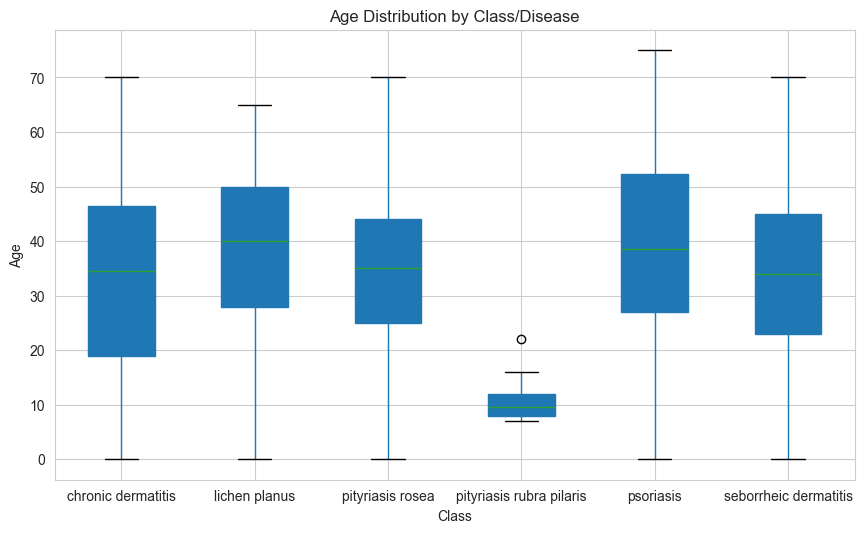

In [ ]:
# Lets look at the distribution of age by class, will that have any significance in the detected disease type?

ax = df.boxplot(column = 'age', by = 'class', figsize=(10,6), patch_artist=True)

plt.xlabel("Class")
plt.ylabel("Age")
plt.title("Age Distribution by Class/Disease")
plt.suptitle("")
plt.show()

We can see here that classes 1-5 have an average age from about 33 to 40, whereas class 6 has a significantly younger age range with the average around 10 years old.

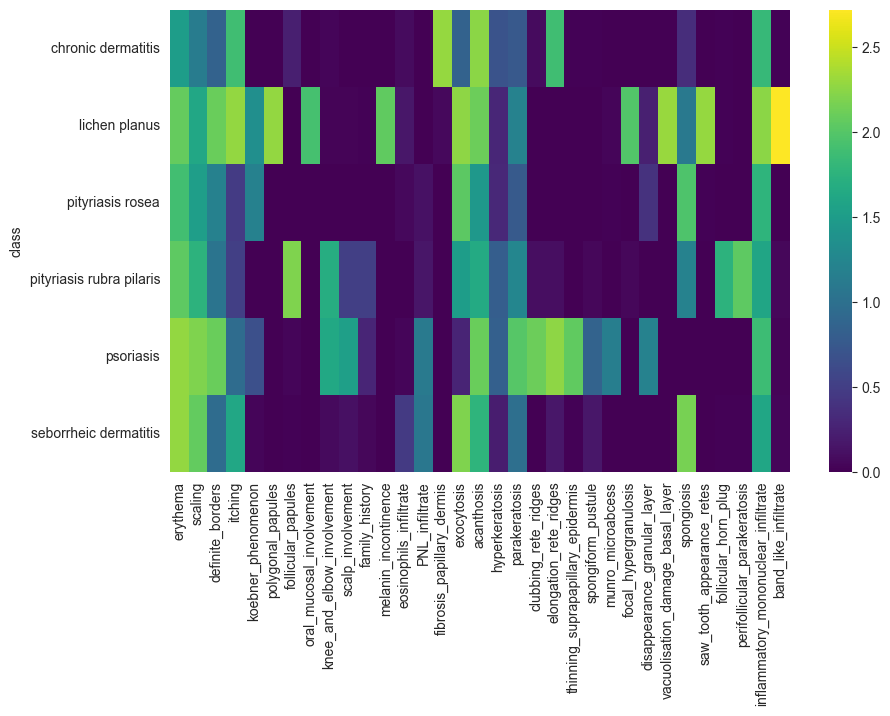

In [144]:
# Look at a correlation map of the feature column means

feature_cols = [column for column in df.columns if column not in ['age', 'class']]
feature_means = df.groupby('class')[feature_cols].mean()

plt.figure(figsize=(10,6))
sns.heatmap(feature_means, annot=False, cmap='viridis')
plt.show()


In the heatmap we can see that the lighter green or yello squares correspond to features that correlate strongly with each respective class. Something to note: band_like_infiltrate being high (closer to 3), may suggest that that patient is of class 3. We can see similar patterns for other features and classes as well. This is something we can determine after modeling using feature_importance.

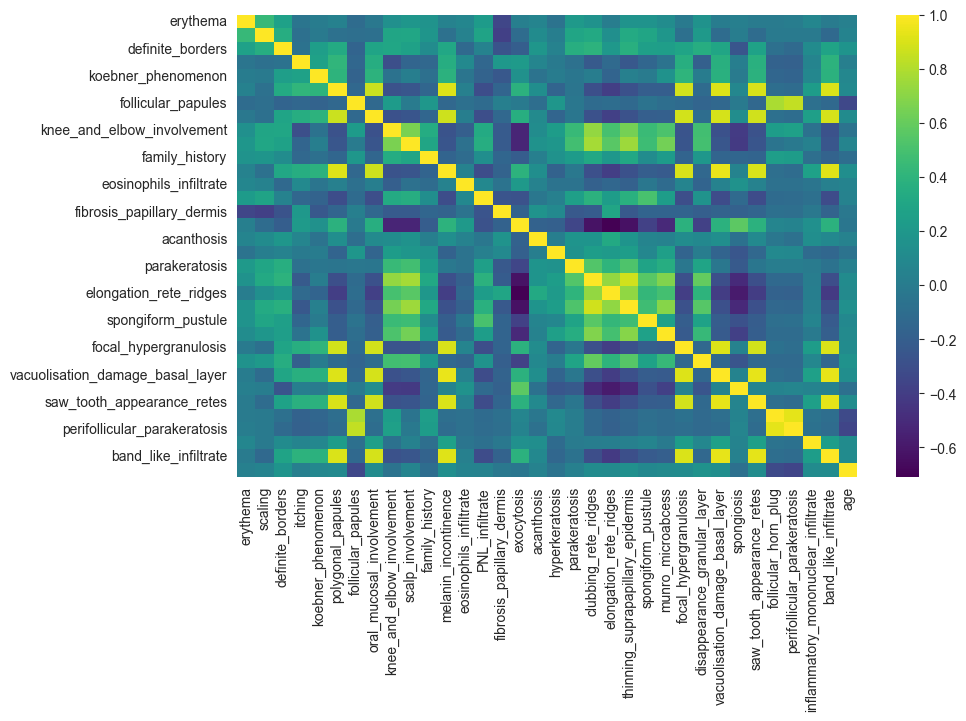

In [145]:
correlation = df.loc[:, df.columns != 'class']
corr = correlation.corr(method = 'pearson')

plt.figure(figsize = (10, 6))
sns.heatmap(corr, annot=False, cmap='viridis')
plt.show()

In [146]:
# Now lets split the data into training and test data and encode the labels
encoder = LabelEncoder()

X = df[feature_cols]
y = df['class']

y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state=42)

In [147]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((292, 33), (74, 33), (292,), (74,))

In [148]:
# Let's first train the Decision Tree Classifier
tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [149]:
# Now let's evaluate the Decition Tree Classifier

y_pred = tree_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
print(classification_report(y_test, y_pred))

Accuracy:  0.9459459459459459
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      0.85      0.92        13
           2       0.78      0.88      0.82         8
           3       1.00      1.00      1.00         3
           4       0.94      1.00      0.97        31
           5       1.00      1.00      1.00         9

    accuracy                           0.95        74
   macro avg       0.95      0.94      0.94        74
weighted avg       0.95      0.95      0.95        74



In [150]:
# Now let's train the Random Forest Classifier
forest_clf = RandomForestClassifier()

forest_clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [151]:
# Now let's evaluate the Random Forest Classifier

pred = forest_clf.predict(X_test)

accuracy1 = accuracy_score(y_test, pred)
print('Accuracy: ', accuracy1)
print(classification_report(y_test, pred))

Accuracy:  0.9864864864864865
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      0.88      0.93         8
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        31
           5       0.90      1.00      0.95         9

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



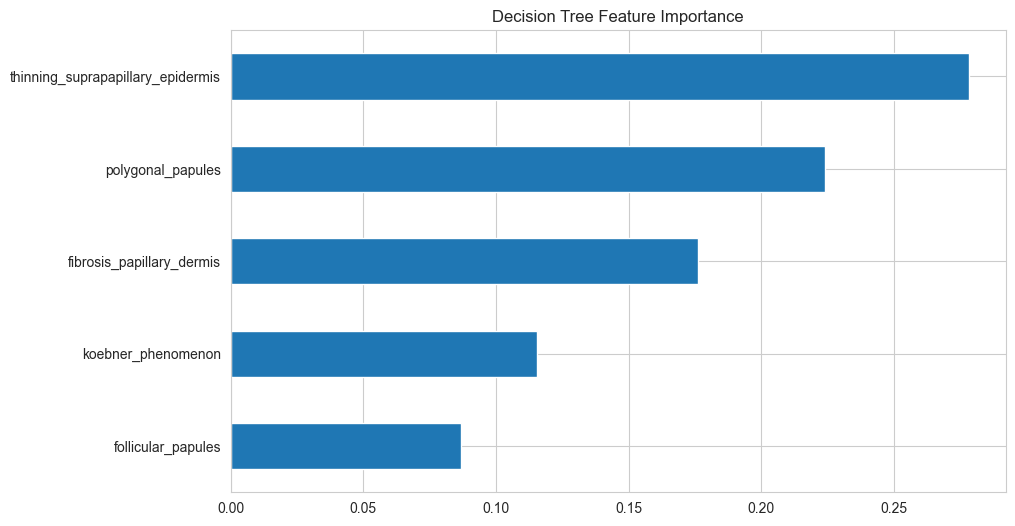

In [160]:
# Let's plot feature importances for both the Decision Tree and the Random Forest

dt_importances = pd.Series(tree_clf.feature_importances_, index = X.columns).sort_values()
top_5 = dt_importances.tail()
top_5.plot(kind = 'barh', figsize = (10, 6))
plt.title("Decision Tree Feature Importance")
plt.show()


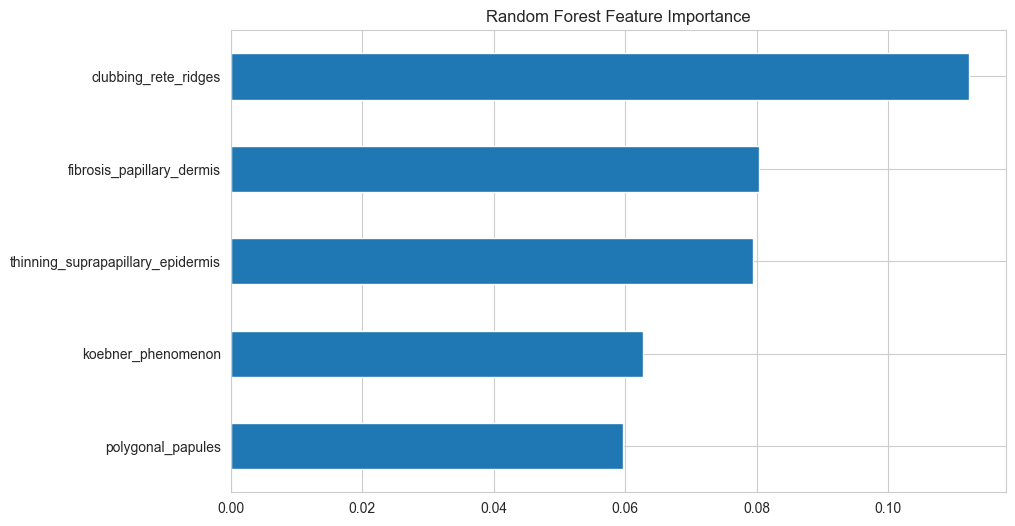

In [161]:
# Now let's plot the importances for the Random Forest

forest_importances = pd.Series(forest_clf.feature_importances_, index = X.columns).sort_values()
top_5_forest = forest_importances.tail()
top_5_forest.plot(kind = 'barh', figsize = (10, 6))
plt.title("Random Forest Feature Importance")
plt.show()